In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/shalu/Documents/Covid_Project/Processed dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/shalu/Documents/Covid_Project/Processed dataset/.DS_Store
/Users/shalu/Documents/Covid_Project/Processed dataset/train/.DS_Store
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0927-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0427-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-1260-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0561-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0757-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0736-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0500-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0393-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0177-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dat

In [3]:
import os
path='Processed dataset/'
train_dir='Processed dataset/train/'
test_dir='Processed dataset/val/'
print(len(os.listdir(train_dir)))

3


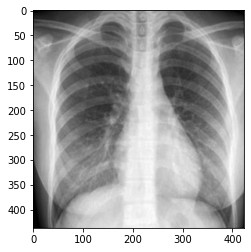

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
path_1='Processed dataset/train/Covid/'
img=path_1+'kjr-21-e25-g001-l-a.jpg'
img=mpimg.imread(img)
plt.imshow(img,cmap='gray')

(1615, 2172)


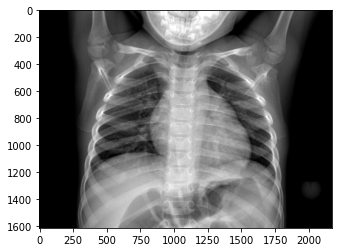

In [8]:
img_2='Processed dataset/train/Normal/IM-0177-0001.jpeg'
img_2=mpimg.imread(img_2)
print(img_2.shape)
plt.imshow(img_2,cmap="gray")

In [9]:
import cv2
def re_size(x):
    img=mpimg.imread(x)
    resized_image=cv2.resize(img,(150,150,3))
    return(resized_img)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')
valid_gen=ImageDataGenerator(rescale=1./255)

In [11]:
img_width=150
img_height=150
ch=3
image_shape=(img_height,img_width,ch)
train=train_gen.flow_from_directory(train_dir,target_size=[150,150],color_mode='rgb',batch_size=16,class_mode='binary',shuffle=True)
valid=valid_gen.flow_from_directory(test_dir,target_size=[150,150],color_mode='rgb',batch_size=16,class_mode='binary',shuffle=True)

Found 904 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [12]:
import tensorflow as tf
model=tf.keras.Sequential([
                          tf.keras.layers.Conv2D(32,(3,3),input_shape=image_shape,activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128,activation='relu'),
                          tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall'])
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [14]:
epochs=15
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[early_stop])

Epoch 1/15


W1204 22:31:37.898057 4523963840 deprecation.py:506] From /Users/shalu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


57/57 [==============================] - 58s 1s/step - loss: 0.4106 - recall: 0.8537 - val_loss: 0.2118 - val_recall: 0.9821
Epoch 2/15
57/57 [==============================] - 54s 941ms/step - loss: 0.3108 - recall: 0.9069 - val_loss: 0.1298 - val_recall: 0.9732
Epoch 3/15
57/57 [==============================] - 55s 967ms/step - loss: 0.1780 - recall: 0.9401 - val_loss: 0.1112 - val_recall: 0.9732
Epoch 4/15
57/57 [==============================] - 59s 1s/step - loss: 0.1875 - recall: 0.9468 - val_loss: 0.1272 - val_recall: 0.9732
Epoch 5/15
57/57 [==============================] - 78s 1s/step - loss: 0.1993 - recall: 0.9357 - val_loss: 0.1206 - val_recall: 0.9643
Epoch 6/15
57/57 [==============================] - 94s 2s/step - loss: 0.1469 - recall: 0.9557 - val_loss: 0.1148 - val_recall: 0.9643
Epoch 7/15
57/57 [==============================] - 102s 2s/step - loss: 0.1652 - recall: 0.9446 - val_loss: 0.1046 - val_recall: 0.9732
Epoch 8/15
57/57 [==============================] - 

In [15]:
print("Mean Recall: %.2f%%" % (np.mean(history.history['recall'])*100))
print("Mean Validation Recall: %.2f%%" % (np.mean(history.history['val_recall'])*100))

Mean Recall: 94.94%
Mean Validation Recall: 97.38%


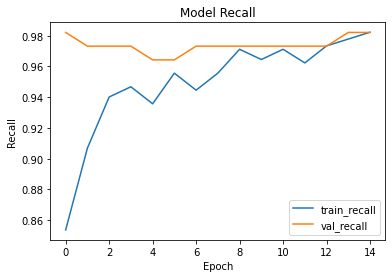

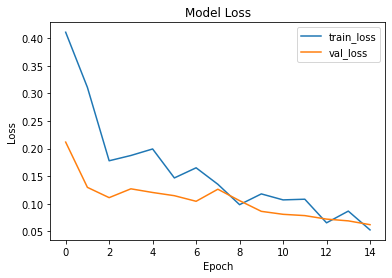

In [16]:
prediction=model.predict(valid)
acc=history.history['recall']
val_acc=history.history['val_recall']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.plot(acc,label='train_recall')
plt.plot(val_acc,label='val_recall')
plt.legend()
plt.figure(num=2)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
